<a href="https://colab.research.google.com/github/alouwyck/maxsypy/blob/main/FSA_jan_2025/Code_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

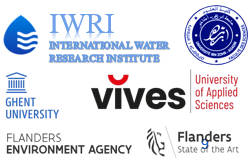<br>


**Modeling Groundwater Flow to Pumping Wells:**<br>
**Innovative Techniques to Understand the Aquifer Behavior**<br>
Séminaire scientifique organisé par le<br>
Laboratoire de Géologie Appliquée et Géo-Environnement<br>
Département de Géologie de la Faculté des Sciences<br>
Université Ibn Zohr<br>
January 9, 2025<br>
Dr. Andy Louwyck

---



# **CODE EXAMPLES**

This notebook contains some code examples that illustrate how to implement some of the solutions and analysis discussed in the presentation. The explanation provided with each example is relatively concise. If you want to get a good understanding of what's going on, I recommend reading the notebook side by side with the slides. For a full comprehension of the discussed models, I refer to [my PhD thesis](https://github.com/alouwyck/PhD) (Louwyck, 2023).

## **0. Import statements**

We need the following libraries:
- [NumPy](https://numpy.org/): library for numerical computation.
- [Pandas](https://pandas.pydata.org/): library for analyzing structured data
- [Matplotlib](https://matplotlib.org/): library for visualizing data
- [Scikit-Learn](https://scikit-learn.org/stable/): machine learning library
- [TensorFlow](https://www.tensorflow.org/) + [Keras](https://keras.io/): deep learning library

We import these libraries using the `import` command. It is customary to give NumPy alias `np`, Pandas alias `pd`, and TensorFlow alias `tf`. From Matplotlib, we need the `pyplot` module; the convention is to import it as `plt`. From Scikit-Learn and Keras, we import the classes we use at the time we need them. Importing module `inspect` will allow us to print the source code of the functions implemented in the `maxsypy` package.

In [1]:
import numpy as np  # numeric python
import pandas as pd  # python data analysis library
import matplotlib.pyplot as plt  # python library for visualizations
import tensorflow as tf  # Google's deep learning library
from tensorflow import keras  # Keras is TensorFlow's high-level API
import inspect  # module to inspect code

We also clone the MAxSyPy package from GitHub for simulating axisymmetric groundwater flow:

In [2]:
import os, shutil

# remove directory 'maxsypy' first if it already exists
path = "maxsypy"
if os.path.exists(path):
    shutil.rmtree(path)

# clone maxsypy repository from Github
!git clone https://github.com/alouwyck/maxsypy

# copy data files to current working directory
data_folder = './data'
if os.path.exists(data_folder):
    shutil.rmtree(data_folder)
shutil.copytree("./maxsypy/seminaries/UM6P_jan_2025/data", data_folder)

# put maxsypy package directory in the current working directory
os.rename(path, 'temp')
shutil.copytree(os.path.join('temp', path), path);
shutil.rmtree('temp')

Cloning into 'maxsypy'...
remote: Enumerating objects: 449, done.
remote: Counting objects: 100% (216/216), done.
remote: Compressing objects: 100% (210/210), done.
remote: Total 449 (delta 87), reused 5 (delta 5), pack-reused 233 (from 2)
Receiving objects: 100% (449/449), 43.92 MiB | 9.37 MiB/s, done.
Resolving deltas: 100% (194/194), done.


The [MAxSyPy](https://github.com/alouwyck/maxsypy) package implements several analytical and semi-analytical solutions discussed in my PhD thesis (Louwyck, 2023).

## **1. Well-known 1D axisymmetric models**

### The Thiem-Dupuit equations

The Thiem equation is used to calculate steady-state *confined* one-dimensional axisymmetric flow to a pumping well, while the Dupuit equation is used to calculate steady-state *unconfined* one-dimensional axisymmetric flow to a pumping well. Let's import functions `thiem` and `Dupuit` from module `maxsypy.special`:

In [20]:
from maxsypy.special import thiem, dupuit

Using `inspect`, it is possible to check the documentation of these functions:

In [21]:
print(inspect.getdoc(thiem))

Calculate hydraulic head at given distances r according to the Thiem formula for steady confined flow.

Parameters
----------
r : array_like
  Radial distances [L], which should be smaller than `r_out`.
T : float
  Aquifer transmissivity [L²/T].
Q : float
    Pumping rate [L³/T] of the well.
r_out : float
      Radial distance [L] of the outer aquifer boundary.
h_out : float, default: 0.0
      Hydraulic head [L] at the outer aquifer boundary at distance `r_out`.

Returns
-------
h : ndarray
  Hydraulic heads [L] at given distances `r`. The shape of `h` is the same as the shape of `r`.


In [22]:
print(inspect.getdoc(dupuit))

Calculate hydraulic head at given distances r according to the Dupuit formula for steady unconfined flow.

Parameters
----------
r : array_like
  Radial distances [L], which should be smaller than `r_out`.
K : float
  Aquifer conductivity [L/T].
h0 : float
   Initial hydraulic head [L] which is the initial aquifer thickness before pumping.
   `h0` is also the constant head at the outer aquifer boundary at distance `r_out`.
Q : float
  Pumping rate [L³/T] of the well (which is negative in case of extraction).
r_out : float
      Radial distance [L] of the outer aquifer boundary.

Returns
-------
h : ndarray
  Hydraulic heads [L] at given distances `r`. The shape of `h` is the same as the shape of `r`.


Note that `maxsypy` requires a negative pumping rate when water is extracted from the aquifer. An example to illustrate the use of these functions:

In [23]:
Q  = -1000    # pumping rate (m³/d): Q < 0 -> extraction
R  = 500      # radius of influence (m)
K  = 10       # conductivity (m/d)
h0 = 20       # initial head = initial aquifer thickness (m)
T  = K * h0   # aquifer transmissivity (m²/d)

r = np.logspace(-2, np.log10(R), 100)   # radial distances (m)

s1 = dupuit(r=r, Q=Q, K=K, r_out=R, h0=h0) - h0  # drawdown (m) according to the Dupuit formula
s2 = thiem(r=r, Q=Q, T=T, r_out=R)               # drawdown (m) according to the Thiem formula

The corresponding plot:

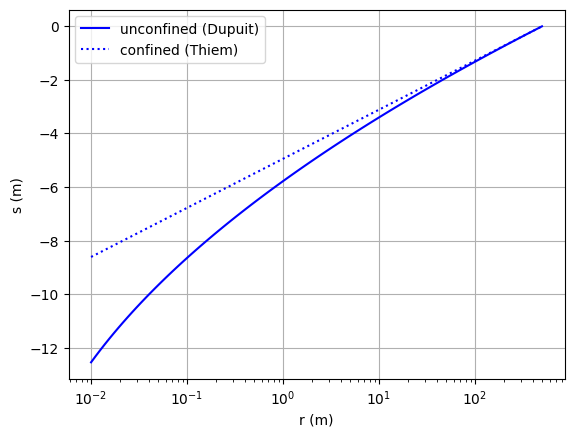

In [25]:
plt.semilogx(r, s1, 'b-', label='unconfined (Dupuit)');  # drawdown s (m) according to the Dupuit formula
plt.semilogx(r, s2, 'b:', label='confined (Thiem)');     # drawdown s (m) according to the Thiem formula
plt.xlabel('r (m)');
plt.ylabel('s (m)');
plt.legend();
plt.grid();

Although previous semi-logarithmic graph is more practical, it's also possible to visualize the actual cone of depression:

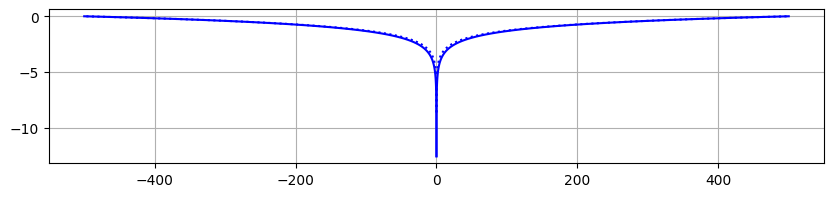

In [26]:
plt.figure(figsize=(10, 2));
plt.plot(-r, s1, 'b-');
plt.plot(r, s1, 'b-');
plt.plot(-r, s2, 'b:');
plt.plot(r, s2, 'b:');
plt.grid();

### The de Glee equation

The de Glee equation is used to simulate steady one-dimensional axisymmetric flow to a pumping well in a leaky aquifer. We import function `deglee` from module `maxsypy.special`:

In [27]:
from maxsypy.special import deglee

print(inspect.getdoc(deglee))

Simulate steady flow to a pumping well in a leaky aquifer, which extracts water at a constant pumping rate.

Parameters
----------
r : array_like
  One-dimensional array with the radial distances [L].
T : float
  Aquifer transmissivity [L²/T].
Q : float
  Pumping rate [L³/T] of the well.
r_in : float, default: 0.O
     Pumping well radius [L], which coincides with the inner model boundary.
c_top : float, default: inf
      Vertical resistance [T] of the aquitard overlying the aquifer.
h_top : float, default: 0.0
      Constant head [L] of the upper boundary condition.
c_bot : float, default: inf
      Vertical resistance [T] of the aquitard underlying the aquifer.
h_bot : float, default: 0.0
      Constant head [L] of the lower boundary condition.

Returns
-------
h : ndarray
  Hydraulic heads [L] at distances `r`.
  The length of `h` equals the length of `r`.


Inspecting the documentation of function `deglee`, we see it implements a generalized version of the de Glee equation which also allows a finite-diameter well and leakage at the bottom of the aquifer.

Going back to the example from previous section, we also need a resistance `c` in this case:

In [34]:
Q  = -1000         # pumping rate (m³/d): Q < 0 -> extraction
K  = 10            # horizontal conductivity (m/d)
h0 = 20            # initial head = initial aquifer thickness (m)
T  = K * h0        # aquifer transmissivity (m²/d)
c  = 500           # aquitard resistance (d)
L  = np.sqrt(T*c)  # leakage factor (m)

r1 = np.logspace(-2, 5, 100)  # radial distances (m)
s1 = deglee(r=r1, Q=Q, T=T, c_top=c)  # drawdown (m) according to the de Glee formula

If we want to approximate the head using the Thiem equation, we first need to calculate the radius of influence:

> $R = 2 e^{-\gamma} \sqrt{Tc}$

where $\gamma$ is [Euler's constant](https://en.wikipedia.org/wiki/Euler%27s_constant), which is implemented as NumPy constant `euler_gamma`:

In [35]:
R1 = 2 * np.exp(-np.euler_gamma) * L  # radius of influence (m)
print(R1)

r2 = np.logspace(-2, np.log10(R1), 100)  # radial distances (m)
s2 = thiem(r=r2, Q=Q, T=T, r_out=R1)     # drawdown (m) according to the Thiem formula

355.0981563946473


A safer way of estimating the radius of influence is taking 4 times the leakage factor:

In [36]:
R2 = 4 * L  # radius of influence (m)
print(R2)

1264.9110640673518


Let's plot the result:

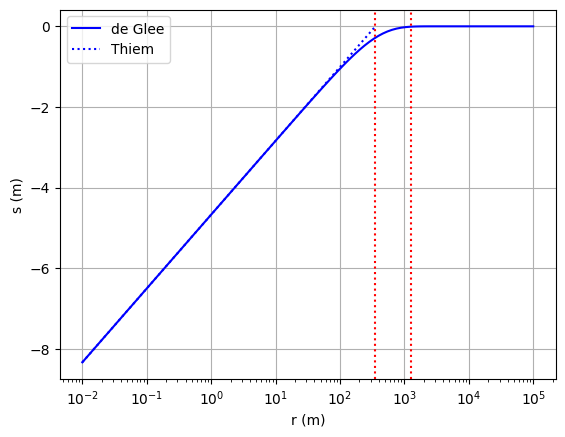

In [37]:
plt.semilogx(r1, s1, 'b-', label="de Glee");  # drawdown (m) according to de Glee formula
plt.semilogx(r2, s2, 'b:', label="Thiem");    # drawdown (m) according to Thiem formula
yl = plt.ylim()
plt.semilogx([R1, R1], yl, 'r:')  # 1st radius of influence (m)
plt.semilogx([R2, R2], yl, 'r:')  # 2nd radius of influence (m)
plt.ylim(yl);
plt.xlabel('r (m)');
plt.ylabel('s (m)');
plt.legend();
plt.grid();

### The Theis equation

The Theis equation is used to simulate transient one-dimensional axisymmetric flow to a pumping well in a confined aquifer. It may also be used to simulate flow to a well fully penetrating a phreatic aquifer, under the condition that the drawdown is relatively small compared with the initial saturated thickness of the aquifer. We import function `theis` from module `maxsypy.special`:

In [33]:
from maxsypy.special import theis

print(inspect.getdoc(theis))

Simulate transient flow to a pumping well in a confined aquifer.
The well has an infinitesimal radius and extracts water at a constant pumping rate.

Parameters
----------
r : array_like
  One-dimensional array with the radial distances [L].
t : array_like
  One-dimensional array with the simulation times [T].
T : float
  Aquifer transmissivity [L²/T].
S : float
  Aquifer storativity [-].
Q : float
  Pumping rate [L³/T] of the well.
h_out : float, default: 0.0
      Constant head [L] at the outer boundary condition, which is also the initial head in the aquifer.

Returns
-------
h : ndarray
  Hydraulic head [L] at distances `r` and times `t`.
  Shape of `h` is `(nr, nt)`, with `nr` the length of `r`, and `nt` the length of `t`.


Our previous example is used again to show how function `Theis` is used. In this case, we also need the aquifer storativity `S`:

In [38]:
Q  = -1000   # pumping rate (m³/d): Q < 0 -> extraction
K  = 10      # horizontal conductivity (m/d)
h0 = 20      # initial head = initial aquifer thickness (m)
T  = K * h0  # aquifer transmissivity (m²/d)
S  = 0.1     # aquifer storativity (-)

r1 = np.logspace(-2, 5, 100)  # radial distances (m)
t  = np.logspace(-3, 3, 3)    # simulation times (d)
s1 = theis(r=r1, t=t, Q=Q, T=T, S=S)  # drawdown (m) according to the Theis equation

Checking the `shape` of head matrix `s1`, it is seen that the number of rows corresponds to the number of distances `r1` whereas the number of columns corresponds to the number of simulation times `t`:

In [39]:
s1.shape

(100, 3)

The Cooper-Jacob approximation states that we can approximate the Theis equation by the Thiem equation for small distances `r` and/or large values of time `t`. To do so, we need to estimate the radius of influence, which is time-dependent in this case:

> $R(t) = \sqrt{\dfrac{4tT}{e^{\gamma}S}}$

In [40]:
R1t = [np.sqrt(4*t*T/S/np.exp(np.euler_gamma)) for t in t]  # list comprehension calculating R(t) for each time t

Let's simulate the corresponding drawdowns using the `thiem` formula:

In [41]:
s2, r2 = [], []
for R1 in R1t:
    r2.append(np.logspace(-2, np.log10(R1), 100))  # radial distances (m)
    s2.append(thiem(r=r2[-1], Q=Q, T=T, r_out=R1))  # drawdown (m) according to the Thiem formula

Just like for the de Glee model, there is a safer way to estimate the radius of influence by taking 8 times the diffusivity $T/S$:

In [42]:
R2t = [np.sqrt(8*t*T/S) for t in t]

Let's plot the result:

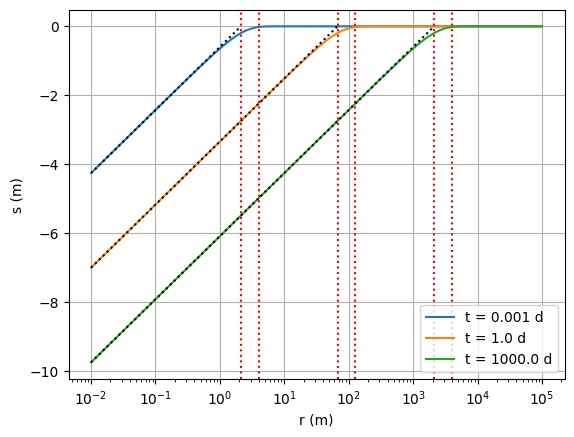

In [43]:
plt.semilogx(r1, s1, '-');  # drawdown (m) according to the Theis equation
plt.legend(['t = '+ str(t) + ' d' for t in t])
yl = plt.ylim()
for i in range(len(t)):
    plt.semilogx(r2[i], s2[i], 'k:');  # drawdown (m) according to the Thiem equation
    plt.semilogx([R1t[i], R1t[i]], yl, 'r:');  # 1st radius of influence (m)
    plt.semilogx([R2t[i], R2t[i]], yl, 'r:');  # 2nd radius of influence (m)
plt.ylim(yl);
plt.xlabel('r (m)');
plt.ylabel('s (m)');
plt.grid();

### The Hantush-Jacob model

The Hantush-Jacob solution is used to simulate transient one-dimensional axisymmetric flow to a pumping well in a leaky aquifer. The solution is implemented in function `hantush_jacob`:

In [44]:
from maxsypy.special import hantush_jacob

print(inspect.getdoc(hantush_jacob))

Simulate transient flow to a pumping well in a leaky aquifer.
The well has an infinitesimal radius and extracts water at a constant pumping rate.

The solution is obtained from numerical inversion of the exact analytical solution in Laplace space.
There is also the option to apply a fast approximation of the Hantush Well function W.
See input parameter `ns`.

Parameters
----------
r : array_like
  One-dimensional array with the radial distances [L].
t : array_like
  One-dimensional array with the simulation times [T].
T : float
  Aquifer transmissivity [L²/T].
S : float
  Aquifer storativity [-].
Q : float
  Pumping rate [L³/T] of the well.
c_top : float
      Vertical resistance [T] of the aquitard overlying the aquifer.
h_top : float, default: 0.0
      Constant head [L] of the upper boundary condition, which is also the initial head in the aquifer.
ns : int, default: 12
   Stehfest number - must be a positive, even integer.
   If `ns` is `None`, then a fast approximation of the Hant

We return to our example to show that the Hantush-Jacob solution can be approximated by the Theis equation for small values of time and that it is virtually the same as the de Glee solution once the flow is in a steady state:

In [45]:
Q  = -1000   # pumping rate (m³/d): Q < 0 -> extraction
K  = 10      # horizontal conductivity (m/d)
h0 = 20      # initial head = initial aquifer thickness (m)
T  = K * h0  # aquifer transmissivity (m²/d)
c  = 500     # aquitard resistance (d)
S  = 0.1     # aquifer storativity (-)

r  = np.logspace(-1, 2, 4)    # radial distances (m)
t  = np.logspace(-5, 5, 100)  # simulation times (d)

s1 = hantush_jacob(r=r, t=t, Q=Q, T=T, S=S, c_top=c)  # drawdown (m) according to Hantush-Jacob
s2 = theis(r=r, t=t, Q=Q, T=T, S=S)                   # drawdown (m) according to Theis
s3 = deglee(r=r, Q=Q, T=T, c_top=c)                   # drawdown (m) according to de Glee

Plotting the result:

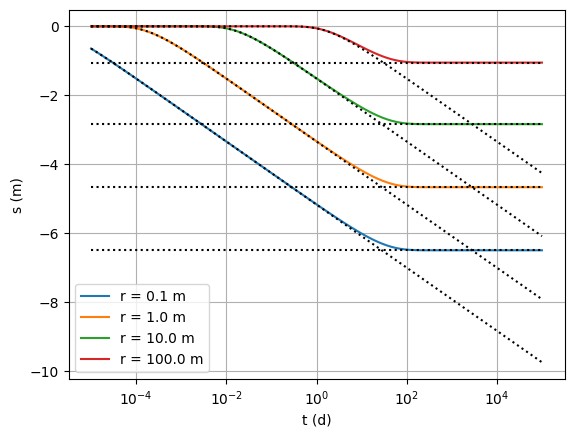

In [46]:
plt.semilogx(t, s1.T, '-');  # drawdown (m) according to Hantush-Jacob
plt.legend(['r = '+ str(r) + ' m' for r in r])
plt.semilogx(t, s2.T, 'k:');  # drawdown (m) according to Theis
plt.semilogx(t[[0, -1]], np.tile(s3, (2, 1)), 'k:');  # drawdown (m) according to de Glee
plt.xlabel('t (d)');
plt.ylabel('s (m)');
plt.grid();

The colored lines are the Hantush-Jacob solution, the horizontal black dotted lines are the de Glee solution, and the descending blakc dotted lines are the Theis solution.

## **2. The superposition principle**

In this section, two well-known examples of the application of the superposition principle are given. The first example applies *superposition in time* to simulate a recovery test, while the second example uses the *method of images* to simulate a pumping well close to a river.

### Theis' recovery test

It is straightforward to simulate a recovery test in a confined aquifer by applying the superposition method to the Theis solution.

We import function `theis_recovery` from module `maxsypy.special`. When we inspect the code, we see it uses function `theis` and it applies superposition in time. First, the pumping is simulated during the entire simulation period, that is during both the pumping and the recovery phase. Then the calculated drawdown for the recovery phase is corrected by superimposing the head change due to a well injecting water at the same rate.

In [129]:
from maxsypy.special import theis_recovery

print(inspect.getsource(theis_recovery))

def theis_recovery(r, t, T, S, Q, t_end, S2=None):
    """
    Simulate pumping followed by recovery in a confined aquifer. The well has an infinitesimal radius and extracts water
    at a constant pumping rate during the pumping phase. The pump is shut down completely at the beginning of the
    recovery phase. The solution is obtained by applying the superposition principle to the Theis equation.

    Parameters
    ----------
    r : array_like
      One-dimensional array with the radial distances [L].
    t : array_like
      One-dimensional array with the simulation times [T].
    T : float
      Aquifer transmissivity [L²/T].
    S : float
      Aquifer storativity [-] during pumping.
    Q : float
      Pumping rate [L³/T] of the well.
    t_end : float
          Time [T] at which the pumping stops and the recovery starts.
    S2 : float, default: None
       Aquifer storativity [-] during recovery. If `S2` is not given, `S2` is set to `S`.

    Returns
    -------
    s : ndarr

Let's illustrate this using the running example from previous section:

In [130]:
Q  = -1000   # pumping rate (m³/d): Q < 0 -> extraction
K  = 10      # conductivity (m/d)
h0 = 20      # initial head = initial aquifer thickness (m)
T  = K * h0  # aquifer transmissivity (m²/d)
S  = 0.1     # aquifer storativity (-)

We simulate the head change in the pumping well with a radius of 0.1 m. The well extracts water from the confined aquifer during 1 day, after which its pump is shut down:

In [131]:
r = 0.1    # radial distance (m)
t_end = 1  # time at which pump is shut down
t = np.logspace(-5, np.log10(t_end), 1000)
t = np.hstack((t, t_end + t))  # simulation times (d)

Let's simulate the model and plot the solutions:

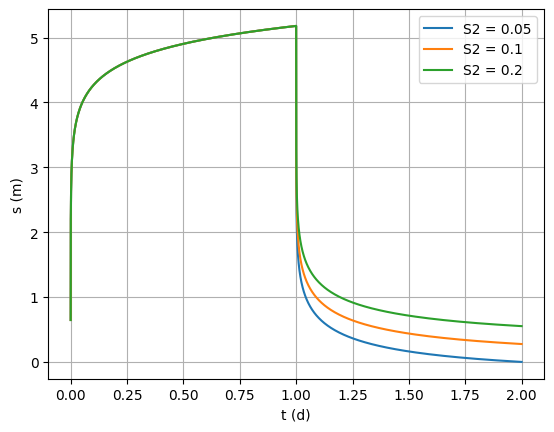

In [132]:
for S2 in np.array([0.5, 1, 2]) * S:  # storativity (-) during recovery
    s = theis_recovery(r=r, t=t, Q=Q, T=T, S=S, t_end=t_end, S2=S2)  # drawdown (m)
    plt.plot(t, s.squeeze(), '-', label="S2 = " + str(S2));

plt.xlabel('t (d)');
plt.ylabel('s (m)');
plt.legend();
plt.grid();

It is possible the aquifer storativity `S2` during recovery is different from the storativity `S` during pumping. That is why additional simulations were performed where `S2` is two times smaller and two times larger than `S`. Although the factor 2 may seem unrealistically large, it is chosen to obtain a clear visual distinction.

### A pumping well close to a river

By applying **the method of images**, it is possible to simulate flow to a pumping well close to a straight river with constant water level. We illustrate the method by applying it to the Theis equation.

We take the same example as before, and additionally, we define a north-south oriented river that is L = 100 m away from the pumping well.

In [133]:
Q  = -1000   # pumping rate (m³/d): Q < 0 -> extraction
K  = 10      # conductivity (m/d)
h0 = 20      # initial head = initial aquifer thickness (m)
T  = K * h0  # aquifer transmissivity (m²/d)
S  = 0.1     # aquifer storativity (-)
L  = 100     # horizontal distance (m) between well and rivier

The well is at position (0, 0), and if the river is located on the left of the well, then we need to define an image well at position (-2L, 0) that injects water at the same rate -Q. Superimposing the head changes of both the pumping well and the imaginary injection well creates a constant-head boundary that coincides with the river:

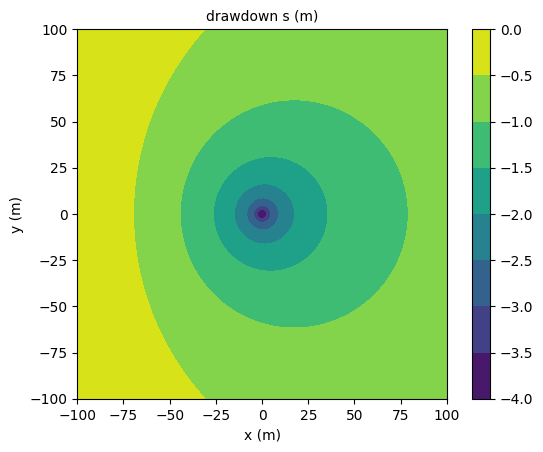

In [134]:
# applying the method of images

t = 1e3  # time (d)
x_pump, y_pump = 0, 0  # pumping well coordinates: (0, 0)
x_im, y_im = -2*L, 0   # image injection well coordinates: (-2L, 0)

x = y = np.linspace(-L, L, 100)     # x and y coordinates (m)
x_grid, y_grid = np.meshgrid(x, y)  # grid coordinates

r_pump = np.sqrt((x_grid - x_pump)**2 + (y_grid - y_pump)**2)  # distances (m) to pumping well
s_pump = theis(r=r_pump.flatten(), t=t, T=T, S=S, Q=Q);  # drawdown (m) due to pumping

r_im = np.sqrt((x_grid - x_im)**2 + (y_grid - y_im)**2)  # distances (m) to injection well
s_im = theis(r=r_im.flatten(), t=t, T=T, S=S, Q=-Q);  # head change (m) due to injection

s_theis = np.reshape(s_pump + s_im, x_grid.shape)
plt.contourf(x_grid, y_grid, s_theis);
plt.colorbar()
plt.gca().set_aspect('equal');
plt.xlabel('x (m)');
plt.ylabel('y (m)');
plt.title('drawdown s (m)', fontdict=dict(fontsize=10));

Recall that the radial distance $r$ between the well $(x_w, y_w)$ and a grid node $(x,y)$ is determined by the Euclidean distance between both points:

> $r = \sqrt{(x-x_w)^2 + (y-y_w)^2}$

The method of images can also be applied to simulate the effect of an impervious lateral boundary close to to the well. In this case, an image well extracting at the same pumping rate is used instead of an imaginary injection well.

As we already know, the Theis equation may be approximated by the Thiem equation for large values of time. The question that comes into mind here is which value for the radius of influence `R` do we have to choose? As the pumping and the injection are balanced, the value for `R` doesn't matter as long as it is sufficiently large:

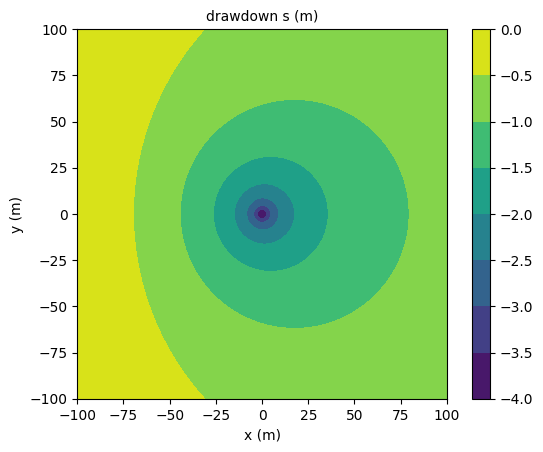

In [ ]:
from maxsypy.special import thiem

R = 1e6  # setting R to a very large value
s_pump = thiem(r=r_pump.flatten(), T=T, Q=Q, r_out=R);  # drawdown (m) due to pumping
s_im = thiem(r=r_im.flatten(), T=T, Q=-Q, r_out=R);  # head change (m) due to injection
s_thiem = np.reshape(s_pump + s_im, x_grid.shape)

plt.contourf(x_grid, y_grid, s_thiem);
plt.colorbar()
plt.gca().set_aspect('equal');
plt.xlabel('x (m)');
plt.ylabel('y (m)');
plt.title('drawdown s (m)', fontdict=dict(fontsize=10));

As expected, we get the same contour plot as before!

---

## **3. Pumping test in a leaky aquifer**

This section shows how to interpret a pumping test performed in a leaky aquifer. Four methods are applied to fit the pumping test data and derive the optimal values for the hydraulic parameters:
1. the [Cooper-Jacob method](http://www.aqtesolv.com/cooper-jacob.htm)
2. the [Levenberg-Marquardt algorithm](https://en.wikipedia.org/wiki/Levenberg%E2%80%93Marquardt_algorithm);
3. the [Nelder-Mead method](https://en.wikipedia.org/wiki/Nelder%E2%80%93Mead_method);
4. an artificial neural network.

### Pumping test data

Consider the pumping test data stored in file `'./data/pumping_test_data.txt'`:

In [47]:
!head ./data/pumping_test_data.txt

Observation well at 197 m from pumping well
Pumping well has discharge equal to 69.1 m³/h
Reference: Jiang Hui, Zeng Buo, Pan Hongyu, 2009. Groundwater Dynamics. Beijing, Geological Publishing House.

time (min)	drawdown (m)
1	0.05
4	0.054
7	0.12
10	0.175
15	0.26


Using Pandas to read the text-file as a `DataFrame`:

In [48]:
df = pd.read_csv('./data/pumping_test_data.txt',
                 sep='\t', skiprows=4)  # use tab as separator and skip first 4 rows
df.head()

,time (min),drawdown (m)
0,1,0.050
1,4,0.054
2,7,0.120
3,10,0.175
4,15,0.260


Plotting the data:

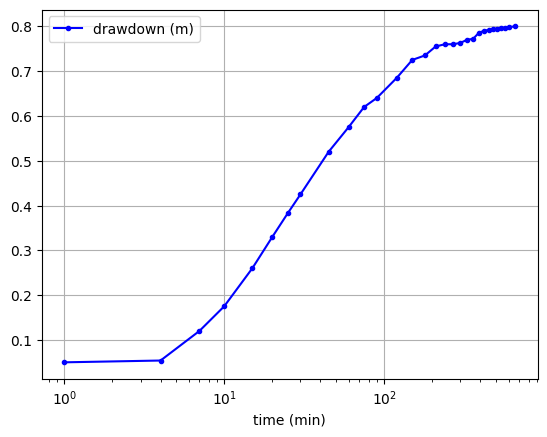

In [55]:
df.plot(x='time (min)', y='drawdown (m)',
        style='b.-', logx=True, grid=True);

These data were observed during a pumping test conducted in a leaky aquifer consisting of gravel (Jiang Hui et al., 2009). The leakage came from an upper unconfined aquifer, which was separated from the extracted aquifer by an aquitard of silty sand. The fully penetrating pumping well extracted water at a constant rate equal to 69.1 m³/h. The observed drawdowns were measured in an observation well at a distance of 197 m from the pumping well:

In [50]:
Q = 69.1 * 24  # pumping rate in m³/d
r_obs = 197    # observation well distance in m

t_obs = df['time (min)'].values / 60 / 24  # observation times in days
s_obs = df['drawdown (m)'].values          # observed drawdowns in m

### Hantush-Jacob

Assuming the separating aquitard is incompressible and drawdown in the unconfined aquifer is negligibly small, the Hantush-Jacob (1955) model can be applied to simulate the pumping test. This model is used indeed to simulate transient one-dimensional axisymmetric flow to a pumping well in a leaky aquifer, as illustrated in the figure below:

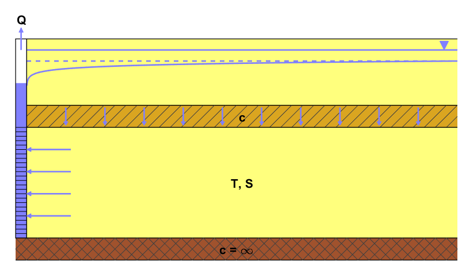

Remember that this model can be simulated using function `hantush_jacob`:

The hydraulic parameters are adopted from a rejected paper in which a random weight particle swarm optimization algorithm (RandWPSO) was applied to interpret the pumping test data:

In [51]:
T_ai = 403.9988961794492     # aquifer transmissivity (m²/d)
S_ai = 1.397843694485632E-4  # aquifer storativity (-)
c_ai = 1 / 1.334002E-3       # aquifer resistance (d)
c_ai

749.6240635321386

Simulating the Hantush-Jacob model using the parameters obtained from this AI method:

In [61]:
s_ai = hantush_jacob(r=r_obs, t=t_obs, Q=Q, T=T_ai, S=S_ai, c_top=c_ai).squeeze()

Adding the simulated drawdown curve to the time-drawdown plot:

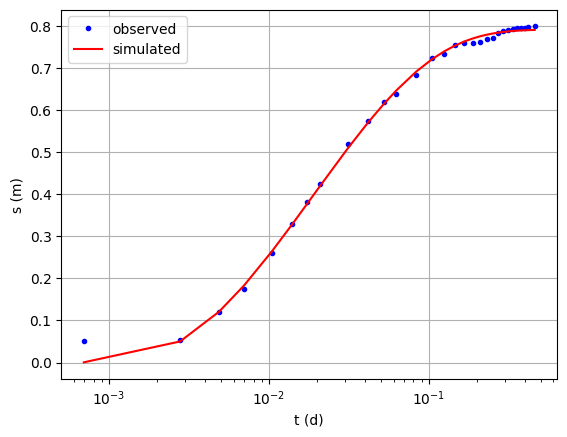

In [62]:
plt.semilogx(t_obs, s_obs, 'b.', label='observed');
plt.semilogx(t_obs, s_ai, 'r-', label='simulated');
plt.grid();
plt.xlabel('t (d)');
plt.ylabel('s (m)');
plt.legend();

Indeed, there is a good correspondence between the observed and simulated drawdowns. However, the rejected paper states that the total computation time to derive the three hydraulic parameters was 4.5 minutes... So, this is not a computationally efficient method!

### Cooper-Jacob

The **Cooper-Jacob method** matches a straight line to drawdown data plotted as a function of the logarithm of time since pumping began. This method is based on the Theis solution and is used to derive optimal values for aquifer transmissivity and storativity. In case of a leaky aquifer, it can therefore only be used for small values of time, when drawdown can be approximated using the Theis solution.

Finding the straight line is done by applying **simple linear regression**, which can be performed easily using Scikit-Learn class `LinearRegression`. We can only take the part of the drawdown curve that exhibits a straight line, so we select the data points with index ranging from 2 to 12:

In [88]:
from sklearn.linear_model import LinearRegression

i = range(2, 12)  # only take data points with index ranging from 2 to 12
X = np.log10(t_obs[i]).reshape(-1, 1) # independent variable X
y = s_obs[i]  # dependent variable y

model = LinearRegression()  # instantiate class
model.fit(X, y)  # fit data
model.score(X, y)  # R² score

0.9971609872676198

We get a **R² score** of 0.997 which indicates the fit is almost perfect! The coefficient of determination R² usually is a value between 0 and 1, and the closer to 1, the better the fit.

Next, we define a function which uses the linear regression `model` to derive values for `T` and `S` by applying the [Cooper-Jacob method](http://www.aqtesolv.com/cooper-jacob.htm):

In [89]:
def cooper_jacob(model):
    '''
    model: a fitted LinearRegression model
    '''
    ds, b = model.coef_.item(), model.intercept_  # derived slope and intercept
    t0 = 10 ** (-b / ds)                          # the intercept of the line on the x axis
    T_fitted = np.log(10.0) * Q / 4 / np.pi / ds  # derived value for T
    S_fitted = 4 / np.exp(np.euler_gamma) * T_fitted * t0 / r_obs**2  # derived value for S
    return T_fitted, S_fitted

T_fitted, S_fitted = cooper_jacob(model)
print(f'Derived T = {T_fitted} m²/d')
print(f'Derived S = {S_fitted}')

Derived T = 616.5081684818896 m²/d
Derived S = 0.00010436392206101531


Let's simulate the observed drawdowns using these derived parameter values:

In [90]:
s_cj = hantush_jacob(r=r_obs, t=t_obs, T=T_fitted, S=S_fitted, c_top=c_ai, Q=Q).squeeze()


Finally, we plot the result: the observed and simulated drawdowns and the fitted regression line:

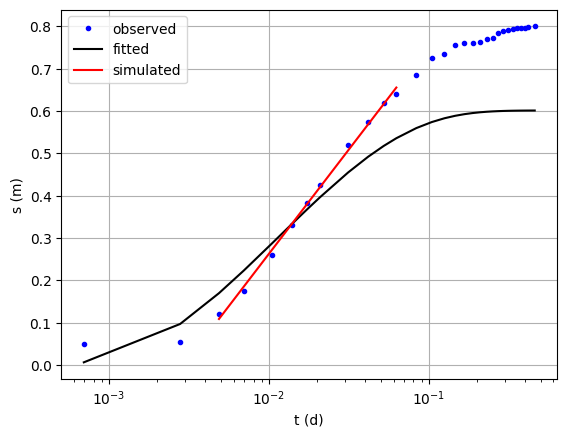

In [93]:
plt.semilogx(t_obs, s_obs, 'b.', label='observed');
plt.semilogx(t_obs, s_cj, 'k-', label='simulated');
plt.grid();
plt.xlabel('t (d)');
plt.ylabel('s (m)');
plt.legend();

xline = np.array([[X.min(), X.max()]]).T  # must be 2D matrix!
yline = model.predict(xline)              # predict regression line
plt.semilogx(10**xline, yline, 'r-');     # plot regression line
plt.legend(['observed', 'fitted', 'simulated']);

We don't get a good match. Let's try nonlinear regression!

### Levenberg-Marquardt

This section shows how to use the traditional [Levenberg-Marquardt algorithm](https://en.wikipedia.org/wiki/Levenberg%E2%80%93Marquardt_algorithm) to interpret the pumping test data in a fraction of a second!

Just like in the rejected paper, the first observation is removed as it is not reliable:

In [94]:
t_obs, s_obs = t_obs[1:], s_obs[1:]  # removing the first observation

A function `residuals` is defined, where residual $\eta_i$ of observation $i$ is defined as:

> $\eta_i = \log_{10}{s_{obs, i}} - \log_{10}{s_{i}}$

with $s_{obs}$ the observed drawdown and $s$ the simulated drawdown.

Note the data are normalized by taking the logarithm of the drawdowns.

In [95]:
def residuals(logP):
    '''
    logP: array_like
        Logarithm of the optimized hydraulic parameters
        logP = [log10(T), log10(S), log10(c)]
    returns: ndarray
           Residuals of the observations
    '''
    T, S, c = tuple(10**logP)
    s = hantush_jacob(r=r_obs, t=t_obs, Q=Q, T=T, S=S, c_top=c)
    return np.log10(s_obs) - np.log10(s.flatten())

Using these residuals, the mean squared error (MSE) is calculated as:

> $MSE = \dfrac{1}{n}\sum_i{\eta_i^2}$

with $n$ the number of observations.

Calculating the MSE for the RandWPSO optimization:

In [96]:
MSE = lambda logP: np.mean(np.square(residuals(logP)))

print(f'MSE RandWPSO = {MSE(np.log10([T_ai, S_ai, c_ai]))}')

MSE RandWPSO = 6.556205477882494e-05


The Levenberg-Marquardt algorithm is available with SciPy function `least_squares`. Module `time` is used to time the computation.

In [97]:
from time import time
from scipy.optimize import least_squares

x0 = np.array([1, -5, 2])  # starting values for logP
start = time()
result = least_squares(fun=residuals, x0=x0, method='lm',
                       ftol=1e-12, xtol=1e-12, gtol=1e-12)
print(f"elapsed time: {time() - start} sec")

elapsed time: 0.036660194396972656 sec


Less than a tenth of a second is needed to perform the optimization! Let's check the result:

In [98]:
result

     message: `xtol` termination condition is satisfied.
     success: True
      status: 3
         fun: [ 1.445e-02 -1.088e-02 ...  2.727e-03  3.484e-03]
           x: [ 2.622e+00 -3.857e+00  2.905e+00]
        cost: 0.000717604095003845
         jac: [[-8.608e-01  1.843e+00 -1.729e-02]
               [-2.910e-01  1.264e+00 -2.692e-02]
               ...
               [ 6.420e-01  9.516e-03 -3.485e-01]
               [ 6.422e-01  6.539e-03 -3.512e-01]]
        grad: [ 3.439e-05 -3.880e-05  9.276e-06]
  optimality: 3.880061054759602e-05
 active_mask: [0 0 0]
        nfev: 75
        njev: None

Printing the optimal values for the hydraulic parameters:

In [99]:
T_lm, S_lm, c_lm = tuple(10**result.x)
print(f"r/B = {r_obs/np.sqrt(T_lm*c_lm)}")
print(f"T = {T_lm}")
print(f"S = {S_lm}")
print(f"c = {c_lm}")
print(f"K/M = {1/c_lm}")

r/B = 0.33966118442493454
T = 418.38884431293474
S = 0.0001391052948927095
c = 804.0082714958618
K/M = 0.0012437682987259504


These values are very close to the optimal values obtained from the AI method, and actually, they may be considered more accurate as the MSE is smaller:

In [100]:
print(f'MSE Levenberg-Marquardt = {MSE(np.log10([T_lm, S_lm, c_lm]))}')

MSE Levenberg-Marquardt = 4.9489937586472084e-05


Simulating the Hantush-Jacob model using the optimal parameters obtained from the Levenberg-Marquardt regression:

In [101]:
s_lm = hantush_jacob(r=r_obs, t=t_obs, Q=Q, T=T_lm, S=S_lm, c_top=c_lm)

Plotting the results:

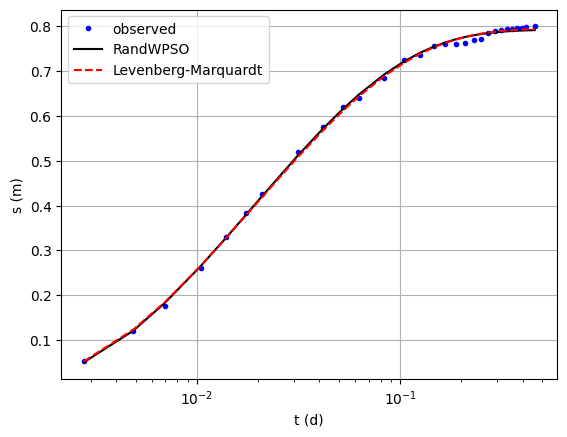

In [103]:
plt.semilogx(t_obs, s_obs, 'b.', label='observed');
plt.semilogx(t_obs, s_ai[1:], 'k-', label='RandWPSO');
plt.semilogx(t_obs, s_lm[0], 'r--', label='Levenberg-Marquardt');
plt.grid();
plt.legend();
plt.xlabel('t (d)');
plt.ylabel('s (m)');

We get a very good match now!

### Nelder-Mead

The Levenberg-Marquardt algorithm is a very efficient method for small unconstrained problems. As an alternative, the derivative-free [Nelder-Mead method](https://en.wikipedia.org/wiki/Nelder%E2%80%93Mead_method) can be applied, which is available with SciPy function `fmin`. Instead of the residuals, this function requires the objective function as input, which is the MSE.

In [104]:
from scipy.optimize import fmin

x0 = np.array([1, -5, 2])  # starting values for logP
start = time()
x = fmin(func=MSE, x0=x0)
print(f'\t MSE = {MSE(x)}')
print(f"elapsed time: {time() - start} sec")

Optimization terminated successfully.
         Current function value: 0.000049
         Iterations: 146
         Function evaluations: 254
	 MSE = 4.948986988651328e-05
elapsed time: 0.11238384246826172 sec


In [105]:
T_nm, S_nm, c_nm = tuple(10**x)
print(f"r/B = {r_obs/np.sqrt(T_nm*c_nm)}")
print(f"T = {T_nm}")
print(f"S = {S_nm}")
print(f"c = {c_nm}")
print(f"K/M = {1/c_nm}")

r/B = 0.3396997421328106
T = 418.36094406637955
S = 0.00013910426019389012
c = 803.8793701867394
K/M = 0.0012439677358155145


Virtually the same optimal values are obtained as with the Levenberg-Marquardt optimization. However, both the Levenberg-Marquardt and Nelder-Mead algorithms can get stuck in local minima, making it crucial to choose the 'right' initial values.

In [107]:
x0 = np.array([1, -5, 0])  # starting values for logP
x = fmin(func=MSE, x0=x0)
print(f'\t MSE = {MSE(x)}')

Optimization terminated successfully.
         Current function value: 0.078927
         Iterations: 159
         Function evaluations: 312
	 MSE = 0.07892673918077135


<ipython-input-95-1f2735f93b93>:11: RuntimeWarning: invalid value encountered in log10
  return np.log10(s_obs) - np.log10(s.flatten())


### Artificial Neural Network

Can we also apply artificial neural networks to interpret pumping tests? This is possible if we first train such a network using **supervised learning** with data that, for example, has been simulated by analytical solutions.

We are going to simulate one thousand synthetic pumping tests using the `hantush_jacob` function. Since the transmissivity is considered unknown, each pumping test will have a different value for T, ranging from 10 to 10,000 m²/d. The values for S and c are adopted from the Levenberg-Marquardt optimization:

In [ ]:
T_range = np.logspace(1, 4, 1000);  # range of T values
s_range = np.array([hantush_jacob(r=r_obs, t=t_obs, Q=Q, S=S_lm, c_top=c_lm, T=T).squeeze()
                    for T in T_range])  # observed drawdowns for each T value
s_range[s_range<=0] = 1e-6  # set negative values for drawdown to 1e-6
s_range.shape

(1000, 29)

We shuffle the elements in `T_range`, and accordinly, the entries of `s_range`:

In [ ]:
# prompt: Shuffle the rows of s_range and the elements in T_range accordingly. Use numpy functions.
np.random.seed(0)
permutation = np.random.permutation(len(T_range))
s_range = s_range[permutation]
T_range = T_range[permutation]

We normalize both T and s by applying a logarithmic transformation:

In [ ]:
# normalize T and s
X = np.log10(s_range[:, :, np.newaxis])
y = np.log10(T_range[:, np.newaxis])

The following code block defines, compiles, and trains a neural network model using Keras to predict a value of T given a series of observed drawdowns s:

First, a sequential model is created with three layers:
1. A 1D convolutional layer `Conv1D` with 4 filters, a kernel size of 2, and ReLU activation.
2. A flattening layer `Flatten` to convert the 2D output of the convolutional layer into a 1D array.
3. A dense layer `Dense` with a single neuron to output the predicted value for T.

The model is compiled with the Adam optimizer, a learning rate of 0.002, mean squared error (`'mse'`) as the loss function, and mean absolute error (`'mae'`) as a metric.

Finally, the model is trained on the input data `X` and target values `y` for 500 epochs with a batch size of 64, and training progress output is suppressed (`verbose=0`):

In [ ]:
# Define the model
model = keras.Sequential([
    keras.layers.Conv1D(filters=4, kernel_size=2, activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(1)  # Output layer for T
])

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.002),
              loss='mse', metrics=['mae'])

# Train the model
result = model.fit(X, y,
                   epochs=500, batch_size=64, verbose=0)

Let's plot the evolution of MSE and MAE during training:

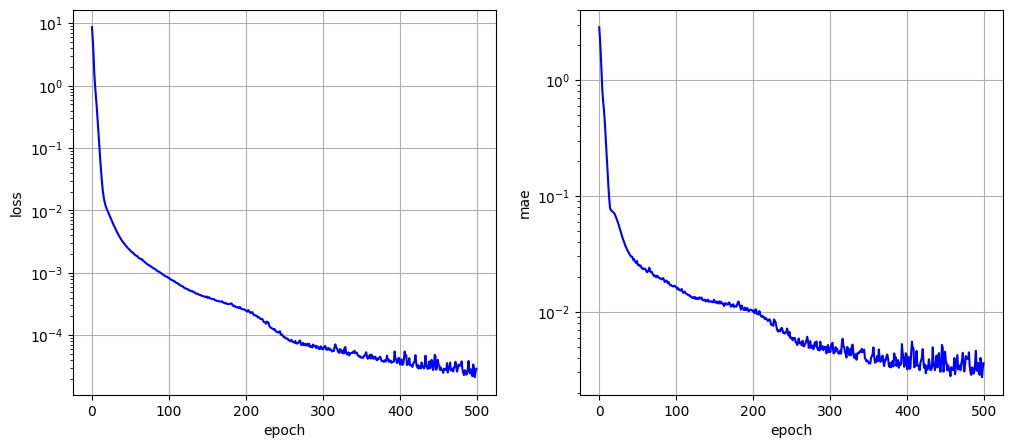

In [ ]:
_, axes = plt.subplots(1, 2, figsize=(12, 5))
for ax, key in zip(axes, ['loss', 'mae']):
    ax.semilogy(result.history[key], 'b-', label='training');
    ax.set_xlabel('epoch');
    ax.set_ylabel(key);
    ax.grid();

The loss is still slightly decreasing after 500 epochs, but the MAE is small enough to stop the training:

In [ ]:
mse, mae = model.evaluate(X, y, verbose=0)
print(f'MSE: {mse}')
print(f'MAE: {mae}')

MSE: 2.952805152744986e-05
MAE: 0.003833551425486803


Calculating the coefficient of determination R² between actual and predicted values of T:

In [ ]:
from sklearn.metrics import r2_score

y_pred = model.predict(X, verbose=0)
T_pred = 10**y_pred.squeeze()  # don't forget the target is log10(T)!
print(f'R² = {r2_score(T_range, T_pred)}')

R² = 0.9995040777849719


We obtain an almost perfect fit, as is seen in the plot below:

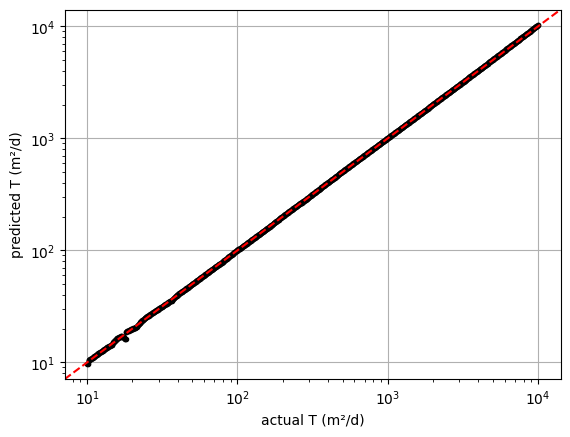

In [ ]:
plt.loglog(T_range, T_pred, 'k.');
xl, yl = plt.xlim(), plt.xlim()
plt.loglog(xl, yl, 'r--');
plt.xlim(xl);
plt.ylim(yl);
plt.grid();
plt.xlabel('actual T (m²/d)');
plt.ylabel('predicted T (m²/d)');

Finally, we predict the value for the transmissivity of the leaky aquifer from the drawdowns observed during the actual pumping test, and we plot te result:

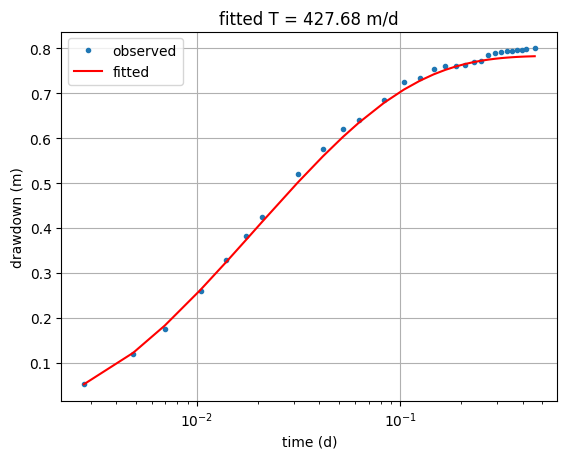

In [ ]:
T_nn = 10**model.predict(np.log10(s_obs[np.newaxis, :, np.newaxis]), verbose=0).squeeze()
s_nn = hantush_jacob(r=r_obs, t=t_obs, Q=Q, S=S_lm, c_top=c_lm, T=T_nn).squeeze()

plt.semilogx(t_obs, s_obs, '.', label='observed');
plt.semilogx(t_obs, s_nn, 'r-', label='fitted');
plt.title(f'fitted T = {T_nn:.2f} m/d')
plt.xlabel('time (d)');
plt.ylabel('drawdown (m)');
plt.grid();
plt.legend();

The value of 428 m²/d predicted by the neural net is very close to the value of 418 m²/d derived using the Levenberg-Marquardt algorithm, so there is a good match between the fitted curve and the observations. But of course, coupling the Hantush-Jacob solution with the Levenberg-Marquardt algorithm is a more efficient method in this case and also provides a more accurate solution in terms of minimizing the MSE. However, applying a neural network in this way could be advantageous in cases where it is not clear which groundwater flow model should be chosen. In such cases, one can train a neural network with various analytical solutions that might be applicable.

---

## **4. Slug test in a confined aquifer**

This section shows how to interpret a slug test performed in a well partially penetrating a confined aquifer. The Nelder-Mead method is applied to fit the slug test data and derive the optimal values for the hydraulic parameters.

### Slug test data

The slug test data are stored in file `'./data/slug_test_data.csv'`:

In [108]:
df = pd.read_csv('./data/slug_test_data.csv')
df.head()

,dt(sec),s(m)
0,0.000,-0.7138
1,0.125,-0.7131
2,0.250,-0.7083
3,0.375,-0.7048
4,0.500,-0.7055


The dataframe contains a column with the observation times and a column with the head changes. Let's further explore and visualize the data:

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5612 entries, 0 to 5611
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt(sec)  5612 non-null   float64
 1   s(m)     5612 non-null   float64
dtypes: float64(2)
memory usage: 87.8 KB


In [110]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
dt(sec),5612.0,350.68750,202.523648,0.0000,175.34375,350.6875,526.03125,701.3750
s(m),5612.0,-0.04386,0.107725,-0.7138,-0.02160,-0.0038,-0.00140,0.0004


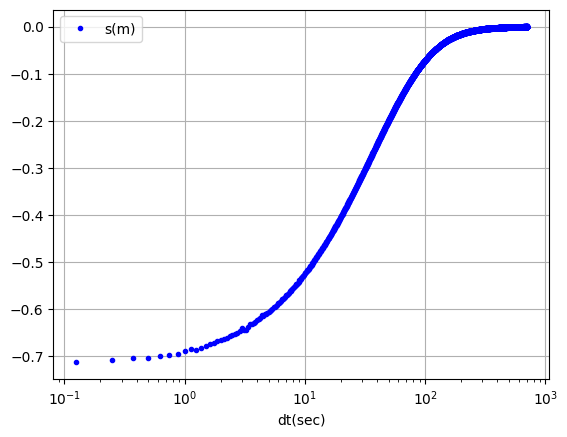

In [111]:
df.plot(x='dt(sec)', y='s(m)', style='b.', logx=True, grid=True);

In total, there are 5612 samples, and the sampling frequency is 8 samples per second, which is considered very high for this type of test. Since the observations at the beginning of the test are significantly more important, we perform a resampling of the data using a logarithmically spaced timeseries:

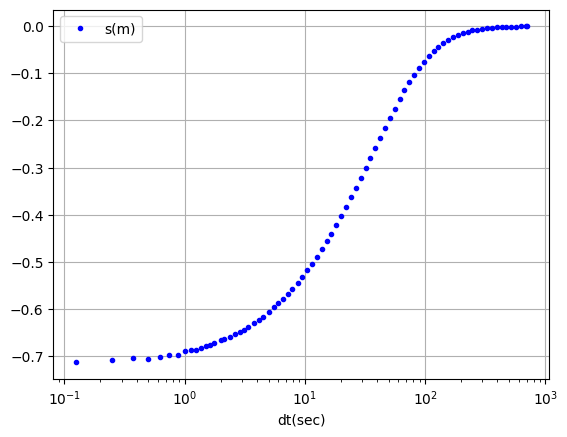

In [112]:
# Generate the target time values
target_times = np.logspace(-1, 3, 100)

# Find the closest time values in the dataframe for each target time
closest_times = []
for target_time in target_times:
    closest_times.append(df['dt(sec)'].iloc[(np.abs(df['dt(sec)'] - target_time)).argmin()])

# Convert the list of closest times to a numpy array to enable boolean indexing
closest_times = np.array(closest_times)

# Select rows from the dataframe where 'dt(sec)' is in the list of closest times
# Use .isin to efficiently check for multiple values
# and .drop_duplicates to ensure uniqueness
new_df = df[df['dt(sec)'].isin(closest_times)].drop_duplicates(subset=['dt(sec)'])

# Plot the result
new_df.plot(x='dt(sec)', y='s(m)', style='b.', logx=True, grid=True);

The result looks good as we now have a time series with data points that are more or less equally spaced on a logarithmic time scale. Let's assign the two columns in the new dataframe to variables `t_obs` and `s_obs`, and convert the times from seconds to days:

In [113]:
t_obs = new_df['dt(sec)'].values / 60 / 60 / 24  # sec -> day
s_obs = -new_df['s(m)'].values  # positive values

The first data point corresponds to the initial head change $H_0$ in the well at $t=0$ :

In [114]:
H0 = s_obs[0]
t_obs, s_obs = t_obs[1:], s_obs[1:]  # remove first data point

### KGS model

The slug test is conducted in a well partially penetrating a layer of clayey sand, which is bounded both above and below by a clay layer. The aquifer has a thickness $B$ of 11 m, and because the head change caused by the slug test is relatively small, it may be considered confined. The distance $d$ between the top of the well-screen and the aquifer top is 4 m. The screen has a length $b$ of 2 m, and the well diameter $r_w$ is 57 mm. The figure below conceptualizes the well in the aquifer:

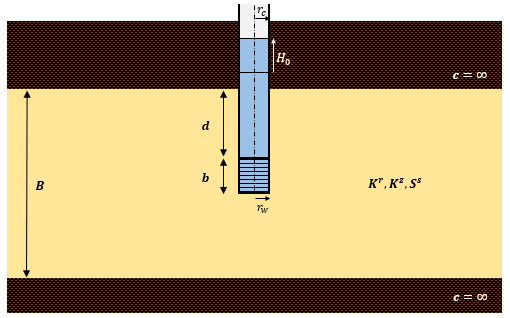

The Kansas Geological Survey developed a semi-analytical model for the simulation of a slug test in a partially penetrating well. The MAxSyPy package offers a Python implementation of the KGS model:

In [115]:
from maxsypy.kgs import KGS_no_skin

print(inspect.getdoc(KGS_no_skin))

Simulate KGS model (without well-skin)
- t (array_like) is time [T]
- H0 (float) is initial head change [L] in well
- rw (float) is well-screen radius [L]
- rc (float) is well-casing radius [L]
- B (float) is aquifer thickness [L]
- b (float) is screen length [L]
- d (float) is distance between screen top and aquifer top
- confined (bool) indicates whether the aquifer is confined (True) or phreatic (False)
- Kr (float) is the horizontal conductivity [L/T]
- Kz (float) is the vertical conductivity [L/T]
- Ss (float) is the specific storage [1/L]
- ns (int) is the Stehfest number (default is 12)
- maxerr (float) is the stop criterion, the maximum absolute head difference (default is 1e-6)
- miniter (int) is the minimum number of iterations (default is 10)
- maxiter (int) is the maximum number of iterations (default is 500)
- htol (float) is the normalized head tolerance (default is 1e-5)
returns the simulated head changes in the well for given times t, the number of iterations,
and the c

Note that we import function `KGS_no_skin` as we do not consider a well-skin. To make the interpretation more straightforward, wrapper function `simulate` is defined, which only has the hydraulic parameters as input:

In [116]:
def simulate(Kr, Kz, Ss):

    s, _, _ = KGS_no_skin(
        t = t_obs,        # simulation times (d)
        confined = True,  # confined aquifer
        b = 2,            # screen length (m)
        B = 11,           # aquifer thickness (m)
        d = 4,            # distance (m) between top of screen and water table
        rw = 0.0285,      # radius (m) of well-screen
        rc = 0.0285,      # radius (m) of well-casing
        Kr = Kr,          # horizontal conductivity (m/d) of aquifer
        Kz = Kz,          # vertical conductivity (m/d) of aquifer
        Ss = Ss,          # specific storage (1/m) of aquifer
        H0 = H0           # initial and instantaneous head change (m) in the well
    )
    return s

The test has already been interpreted by visually fitting the slug test data to drawdown curves simulated using the KGS model. These are the manually derived parameter values:

In [117]:
Kr = 2.22     # horizontal conductivity (m/d) of aquifer
Kz = 0.07     # vertical conductivity (m/d) of aquifer
Ss = 0.00009  # specific storage (1/m) of aquifer

Let's simulate and plot the result of this manual interpretation:

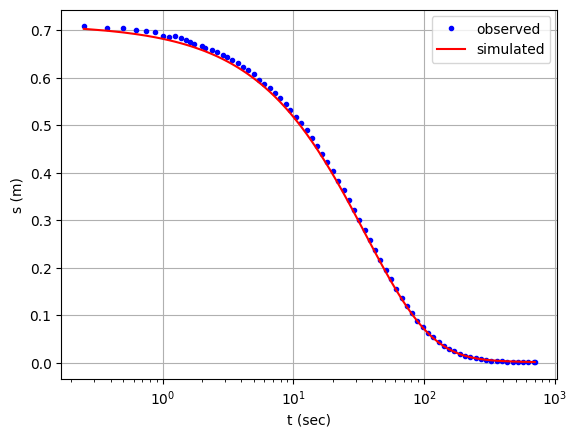

In [118]:
s = simulate(Kr, Kz, Ss)
t_sec = t_obs * 3600 * 24

plt.semilogx(t_sec, s_obs, 'b.', label='observed');
plt.semilogx(t_sec, s, 'r-', label='simulated');
plt.legend();
plt.xlabel('t (sec)');
plt.ylabel('s (m)');
plt.grid();

There is a very good agreement between the simulated curve and the observed data. However, the problem is that such a manual curve-fitting method is subjective. Therefore, let's apply the Nelder-Mead method to fit the data.

### Nelder-Mead

Like in previous example, we define functions `residuals` and `MSE`:

In [119]:
def residuals(logP):
    '''
    logP: array_like
        Logarithm of the optimized hydraulic parameters
        logP = [log10(Kr), log10(Kz), log10(Ss)]
    returns: ndarray
           Residuals of the observations
    '''
    Kr, Kz, Ss = tuple(10**logP)
    s = simulate(Kr, Kz, Ss)
    return s_obs - s  # no log transform!

MSE = lambda logP: np.mean(np.square(residuals(logP)))  # mean squared error

Note that we do not normalize the data because the values are already between 0 and 1.

Recall that the Nelder-Mead method is implemented in SciPy function `fmin`:

In [120]:
from scipy.optimize import fmin

x0 = np.array([0, 0, -5])  # starting values for logP
x = fmin(func=MSE, x0=x0)
print(f'\t MSE = {MSE(x)}')

Kr, Kz, Ss = tuple(10**x)
print('\nOptimal values:')
print(f'\t Kr = {Kr} m/d')
print(f'\t Kz = {Kz} m/d')
print(f'\t Ss = {Ss} m^-1')

Optimization terminated successfully.
         Current function value: 0.000005
         Iterations: 232
         Function evaluations: 412
	 MSE = 4.58556435401376e-06

Optimal values:
	 Kr = 3.2437663500170486 m/d
	 Kz = 0.0001843799706562987 m/d
	 Ss = 1.718446610208439e-06 m^-1


We got a solution! Let's plot the result:

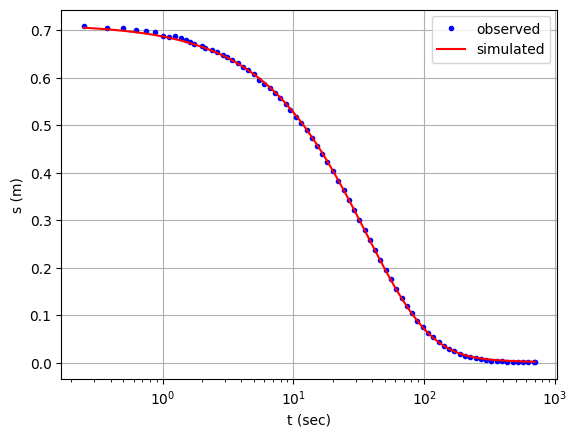

In [121]:
s = simulate(Kr, Kz, Ss)
plt.semilogx(t_sec, s_obs, 'b.', label='observed');
plt.semilogx(t_sec, s, 'r-', label='simulated');
plt.grid();
plt.legend();
plt.xlabel('t (sec)');
plt.ylabel('s (m)');

We can clearly see that the Nelder-Mead method provides a better fit! Here too, the choice of initial values is crucial to arriving at a solution. The optimal value for the horizontal conductivity is slightly higher than the manually derived value, while the optimal values for the other two parameters differ significantly. However, it should be noted that in general, vertical conductivity and specific storage cannot be reliably derived from slug test data.

---

## **5. Multilayer flow: the Hemker solutions**

In previous sections, specific axisymmetric models were illustrated. The solutions of these models are available from module `maxsypy.special`.

The generalized multilayer solutions for steady and transient multilayer flow developed by Hemker are implemented respectively in classes `Steady` and `Transient`, and can be imported from module `maxsypy.multilayer`:

In [122]:
from maxsypy.multilayer import Steady, Transient

In [123]:
print(inspect.getdoc(Steady))

Class to simulate steady two-dimensional radial or parallel flow in a multilayer aquifer system.

Parameters
----------
T : array_like
  Layer transmissivities [L²/T]. The length of `T` is equal to the number of layers.
Q : array_like, default: `None`
  Discharges [L³/T] at inner model boundary. The length of `Q` is equal to the number of layers.
h_in : array_like, default: `None`
     Constant heads [L] at inner model boundary. The length of `h_in` is equal to the number of layers.
c : array_like
  Vertical resistances [T] between layers. The length of `c` is the number of layers minus one.
c_top : float, default: `inf`
      Vertical resistance [T] of the upper boundary of the aquifer system.
      By default, the upper boundary is impervious.
h_top : float, default: `0.0`
      Constant head [L] of the upper boundary condition.
c_bot : float, default: `inf`
      Vertical resistance [T] of the lower boundary of the aquifer system.
      By default, the lower boundary is impervious.


In [124]:
print(inspect.getdoc(Transient))

Class to simulate transient two-dimensional radial or parallel flow in a multilayer aquifer system.

Parameters
----------
T : array_like
  Layer transmissivities [L²/T]. The length of `T` is equal to the number of layers.
S : array_like
  Layer storativities [-]. The length of `S` is equal to the number of layers.
Q : array_like, default: `None`
  Discharges [L³/T] at inner model boundary. The length of `Q` is equal to the number of layers.
h_in : array_like, default: `None`
     Constant heads [L] at inner model boundary. The length of `h_in` is equal to the number of layers.
c : array_like
  Vertical resistances [T] between layers. The length of `c` is the number of layers minus one.
c_top : float, default: `inf`
      Vertical resistance [T] of the upper boundary of the aquifer system.
      By default, the upper boundary is impervious.
h_top : float, default: `0.0`
      Constant head [L] of the upper boundary condition.
c_bot : float, default: `inf`
      Vertical resistance [T] 

### Radial flow

Let's illustrate the use of these classes by constructing the following three-layer model:

In [125]:
T = [100, 200, 50]            # aquifer transmissivities (m²/d)
S = [0.1, 0.05, 0.01]         # aquifer storativities (-)
c = [100, 500, 1000, np.inf]  # aquitard resistances (d)
Q = [-100, -250, 0]           # pumping rates (m³/d)

The steady-state and transient-state are instantiated as follows:

In [126]:
steady = Steady(T=T, Q=Q, c_top=c[0], c=c[1:-1], c_bot=c[-1])
transient = Transient(T=T, S=S, Q=Q, c_top=c[0], c=c[1:-1], c_bot=c[-1])

Head or drawdown is simulated by invoking method `h` on these model objects. In case of a steady-state model, only distances `r` are passed:

> `s1 = steady.h(r)`

The transient-state model also needs times `t`:

> `s2 = transient.h(r, t)`

Let's illustrate the use of these methods by creating the time-drawdown and the distance-drawdown graphs for this example:

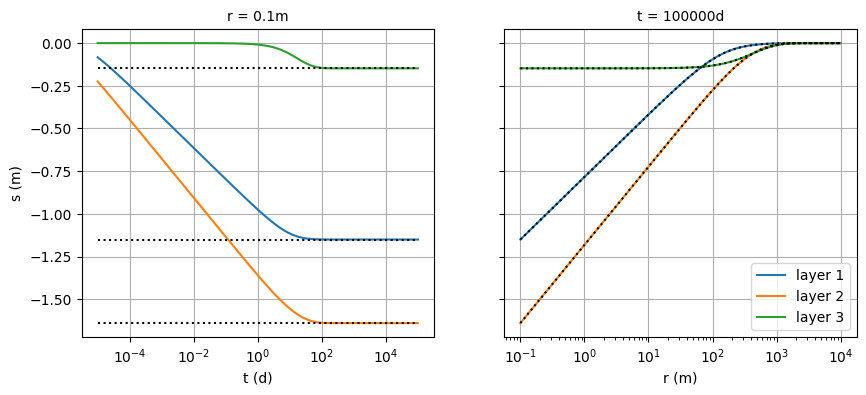

In [127]:
r = np.logspace(-1, 4, 100)  # radial distances (m)
t = np.logspace(-5, 5, 100)  # simulation times (d)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True);

ax1.semilogx(t, transient.h(r[0], t).squeeze().T);  # transient drawdown (m)
ax1.semilogx(t[[0, -1]], steady.h([r[0], r[0]]).T, 'k:');  # steady-state drawdown (m)
ax1.set_ylabel('s (m)');
ax1.set_xlabel('t (d)');
ax1.set_title('r = ' + str(r[0]) + 'm', fontdict=dict(size=10));
ax1.grid();

ax2.semilogx(r, transient.h(r, t[-1]).squeeze().T);  # transient drawdown (m)
ax2.semilogx(r, steady.h(r).T, 'k:');  # steady-state drawdown (m)
ax2.legend([f'layer {i+1}' for i in range(steady.nl)]);
ax2.set_xlabel('r (m)');
ax2.set_title('t = ' + str(int(t[-1])) + 'd', fontdict=dict(size=10));
ax2.grid();

We see that that steady state is reached after approximately 100 days of pumping.

### Parallel flow

Note that the same classes can be used to simulate **parallel flow** in a multilayer aquifer system. As an example, consider a river with a half-width of 10 m in which the water level is increased by 1 m:

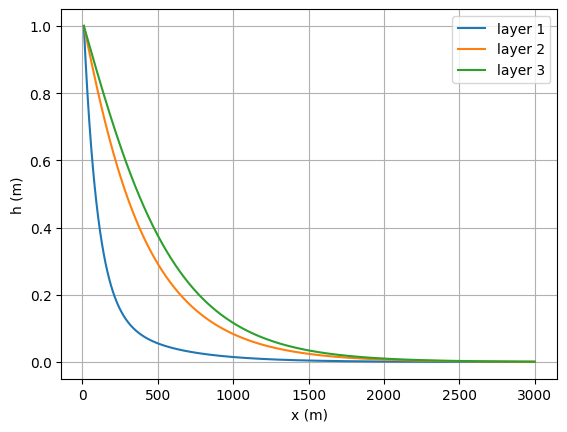

In [128]:
river = Steady(T=T, c_top=c[0], c=c[1:-1], c_bot=c[-1],  # hydraulic parameters
               r_in=10,         # half-width of the river is 10 m
               h_in=[1, 1, 1],  # instead of pumping rate Q, a constant head h_in equal to 1 m is defined
               axi=False)       # by default axi is True, but in case of parallel flow, it is set to False

x = np.linspace(river.r_in, 3000, 1000)  # horizontal distances (m)
h = river.h(x)  # head change (m)

plt.plot(x, h.T);
plt.legend([f'layer {i+1}' for i in range(river.nl)]);
plt.xlabel('x (m)');
plt.ylabel('h (m)');
plt.grid();

## **6. A drainage system of combined pumping and infiltration**

In this section we simulate the effect of the drainage system at the excavation site 'Duinenabdij'. The system consists of pumping and injections wells. The total pumping rate equals the total injection rate as all the extracted groundwater is re-injected into the aquifer system. As a consequence, the system will finally reach a steady state. Therefore, we use class `Steady` to simulate the individual head change of each well. The total head change is obtained by summing all individual head changes according to the *superposition principle*.

In [ ]:
from maxsypy.multilayer import Steady

The coordinates of the pumping and injection wells.

In [ ]:
# pumping wells
pwells = np.array([ [170.61611374, 246.2633452 ],
                    [197.63033175, 237.01067616],
                    [223.93364929, 236.29893238],
                    [248.81516588, 234.87544484],
                    [278.67298578, 237.72241993],
                    [287.91469194, 259.0747331 ],
                    [296.44549763, 286.12099644],
                    [320.61611374, 289.6797153 ],
                    [345.49763033, 294.66192171],
                    [375.35545024, 302.4911032 ],
                    [400.9478673 , 307.47330961],
                    [418.00947867, 276.8683274 ],
                    [398.81516588, 243.41637011],
                    [386.72985782, 217.08185053],
                    [370.37914692, 186.47686833],
                    [351.18483412, 170.81850534],
                    [326.30331754, 155.87188612],
                    [293.60189573, 168.68327402],
                    [270.85308057, 191.45907473],
                    [248.81516588, 187.90035587],
                    [222.51184834, 181.49466192],
                    [199.0521327 , 183.62989324],
                    [181.99052133, 200.        ],
                    [162.79620853, 217.79359431],
                    [409.47867299, 292.17081851],
                    [408.41232227, 260.14234875] ])

In [ ]:
# injection wells
iwells = np.array([ [106.63507109, 261.20996441],
                    [120.14218009, 272.59786477],
                    [138.62559242, 292.52669039],
                    [145.73459716, 306.76156584],
                    [161.37440758, 318.86120996],
                    [179.85781991, 326.69039146],
                    [193.36492891, 338.79003559],
                    [212.55924171, 346.61921708],
                    [231.04265403, 355.87188612],
                    [248.1042654 , 362.27758007],
                    [260.18957346, 368.68327402],
                    [272.98578199, 381.49466192],
                    [290.04739336, 388.61209964],
                    [310.66350711, 397.86476868],
                    [330.56872038, 412.8113879 ],
                    [352.60663507, 427.75800712],
                    [375.35545024, 425.6227758 ],
                    [393.12796209, 417.08185053],
                    [411.61137441, 417.08185053],
                    [429.38388626, 423.48754448],
                    [450.        , 423.48754448],
                    [477.72511848, 417.08185053],
                    [491.23222749, 397.86476868],
                    [463.86255924, 420.28469751] ])

Plotting the wells:

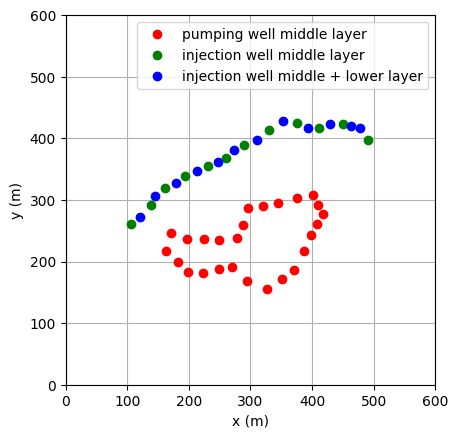

In [ ]:
plt.plot(pwells[:, 0], pwells[:, 1], 'ro', label='pumping well middle layer');
plt.plot(iwells[::2, 0], iwells[::2, 1], 'go', label='injection well middle layer');
plt.plot(iwells[1::2, 0], iwells[1::2, 1], 'bo', label='injection well middle + lower layer');

plt.xlabel('x (m)');
plt.ylabel('y (m)');
lim = (0, 600)
plt.xlim(lim);
plt.ylim(lim);
plt.grid();
plt.gca().set_aspect('equal', 'box');
plt.legend();

The original pumping and injection rates (m³/d):

In [ ]:
# pumping and injection rates
npw, niw = len(pwells), len(iwells)
print(f"{npw} pumping wells")
print(f"{niw} injection wells")
Q_grav = 4.0  # P1: discharge through gravel pack surrounding the pumping wells (upper layer)
Q_pump = 60.0  # P2: pumping rate (middle layer)
Q_deep = -40.0  # P4: deep injection rate (lower layer)
Q_inj = -(npw * (Q_pump + Q_grav) + niw / 2 * Q_deep) / niw  # P3: injection rate (middle layer)
print(f"gravel pack discharge (upper layer): {Q_grav:.2f} m³/d")
print(f"pumping rate (middle layer): {Q_pump:.2f} m³/d")
print(f"injection rate (middle layer): {Q_inj:.2f} m³/d")
print(f"injection rate (lower layer): {Q_deep:.2f} m³/d")

26 pumping wells
24 injection wells
gravel pack discharge (upper layer): 4.00 m³/d
pumping rate (middle layer): 60.00 m³/d
injection rate (middle layer): -49.33 m³/d
injection rate (lower layer): -40.00 m³/d


The aquifer system consists of three permeable layers separated by two semi-pervious layers. As we assume the flow is in a steady state, the latter can be conceptualized as incompressible zero-thickness resistance layers:

In [ ]:
# transmissivities T (m²/d) and resistances c (d)
T = [2.9 * 12, 5.2 * 13.8, 10.7 * 42.0]  # T = D * Kh
c = [1300.0, 49.70]  # confined system

Creating the superposition grid:

In [ ]:
# 600m x 600m meshgrid
n = 100
coord = np.linspace(0, 600, n)
xgrid, ygrid = np.meshgrid(coord, coord)

Defining function `euclidean` to calculate Euclidean distance between two points:

In [ ]:
euclidean = lambda x1, y1, x2, y2: np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

As the aquifer system is confined and steady flow is simulated, the system cannot be laterally unbounded. Therefore we need to define a point at a very large distance at which drawdown is zero. This is a constant-head boundary that will determine the outer model boundary of each axisymmetric model that will be used to simulate the head change due to the individual wells. Because extraction and injection are balanced and the point is at very large distance, this boundary condition will have no significant impact on the total head change.

In [ ]:
# constant-head point (x0, y0) at very large distance
x0, y0 = 1e5, 1e5

Finally, we are ready to apply the superposition method:

In [ ]:
# initializing the drawdown array
s = np.zeros((len(T), n, n))

# calculate drawdown due to each pumping well
for xy in pwells:
    x, y = tuple(xy)
    r_out = euclidean(x, y, x0, y0)  # determine the outer model boundary using (x0, y0)
    model = Steady(T=T, c=c, Q=[Q_grav, Q_pump, 0], r_out=r_out)
    r = euclidean(x, y, xgrid, ygrid)
    s += model.h(r=r.flatten()).reshape(s.shape)

# calculate the head change due to each injection well
for i, xy in enumerate(iwells):
    x, y = tuple(xy)
    r_out = euclidean(x, y, x0, y0)
    Q3 = Q_deep if i%2 else 0.0  # only half of the injection wells recharge the lower aquifer
    model = Steady(T=T, c=c, Q=[0, Q_inj, Q3], r_out=r_out)
    r = euclidean(x, y, xgrid, ygrid)
    s += model.h(r=r.flatten()).reshape(s.shape)

Plotting the result:

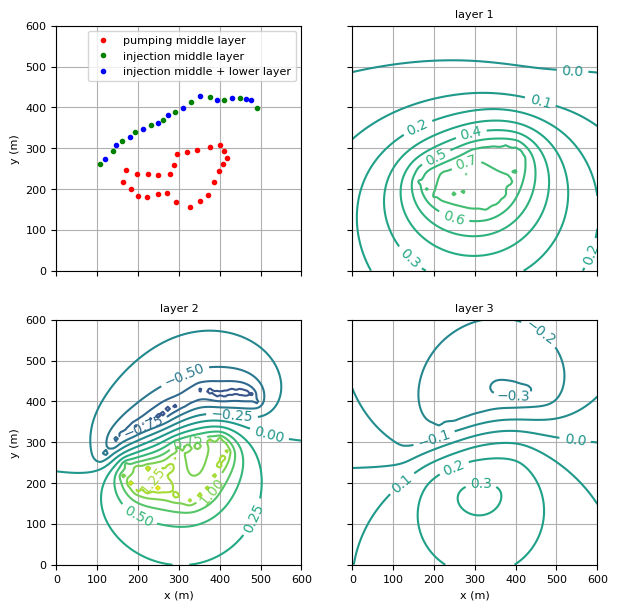

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(7, 7), sharex=True, sharey=True);

lim = (0, 600)
d = 100
fontsize = 8

ax[0][0].plot(pwells[:, 0], pwells[:, 1], 'r.', label='pumping middle layer');
ax[0][0].plot(iwells[::2, 0], iwells[::2, 1], 'g.', label='injection middle layer');
ax[0][0].plot(iwells[1::2, 0], iwells[1::2, 1], 'b.', label='injection middle + lower layer');
ax[0][0].set_xlim(lim);
ax[0][0].set_ylim(lim);
ax[0][0].set_aspect('equal', 'box');
ax[0][0].grid();

for i, a in enumerate([ax[0][1], ax[1][0], ax[1][1]]):
    step = 0.25 if i == 1 else 0.1
    cs = a.contour(xgrid, ygrid, s[i, :, :], levels=np.arange(-2, 2, step))
    a.clabel(cs, cs.levels, inline=True);
    a.set_title('layer ' + str(i+1), fontsize=fontsize);
    a.set_xlim(lim);
    a.set_ylim(lim);
    a.set_aspect('equal', 'box');
    a.grid()

ax[0][0].set_yticks(np.arange(lim[0], lim[1] + d, d));
ax[0][0].set_yticklabels(np.arange(lim[0], lim[1] + d, d), fontsize=fontsize);
ax[1][0].set_yticks(np.arange(lim[0], lim[1] + d, d));
ax[1][0].set_yticklabels(np.arange(lim[0], lim[1] + d, d), fontsize=fontsize);
ax[1][0].set_xticks(np.arange(lim[0], lim[1] + d, d));
ax[1][0].set_xticklabels(np.arange(lim[0], lim[1] + d, d), fontsize=fontsize);
ax[1][1].set_xticks(np.arange(lim[0], lim[1] + d, d));
ax[1][1].set_xticklabels(np.arange(lim[0], lim[1] + d, d), fontsize=fontsize);
ax[0][0].set_ylabel('y (m)', fontsize=fontsize);
ax[1][0].set_ylabel('y (m)', fontsize=fontsize);
ax[1][0].set_xlabel('x (m)', fontsize=fontsize);
ax[1][1].set_xlabel('x (m)', fontsize=fontsize);
ax[0][0].legend(fontsize=fontsize);

---